In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer
from rtbm.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

# Example 1

## Generate data

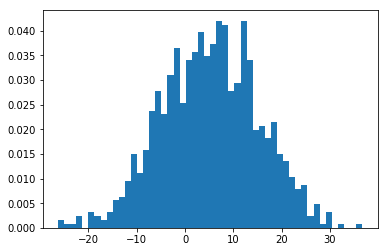

In [2]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [3]:
a = RTBM(1,1)

In [4]:
minim = minimizer.CMA(True)

CMA on 16 cpu(s) enabled


In [5]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-4)

(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=502216, Mon Oct 30 17:44:35 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 4.505490715258866e+03 1.0e+00 9.56e-02  8e-02  1e-01 0:00.4
    2     18 6.343105972005156e+03 1.3e+00 1.01e-01  9e-02  1e-01 0:01.0
    3     27 4.685533296863540e+03 1.5e+00 1.03e-01  9e-02  1e-01 0:01.8
   10     90 4.085994450782456e+03 2.9e+00 1.27e-01  9e-02  2e-01 0:05.2
   19    171 3.842233745091477e+03 3.8e+00 1.14e-01  8e-02  1e-01 0:09.2
   30    270 3.734321610878264e+03 5.1e+00 6.19e-02  4e-02  6e-02 0:14.3
   44    396 3.725688240857466e+03 7.5e+00 4.21e-02  2e-02  4e-02 0:20.4
   61    549 3.724972386604427e+03 1.2e+01 2.61e-02  7e-03  2e-02 0:27.6
   81    729 3.722807346371771e+03 3.3e+01 8.65e-03  1e-03  1e-02 0:35.8
  100    900 3.722783266120781e+03 8.2e+01 4.65e-03  3e-04  7e-03 0:44.0
  123   1107 3.722783243883657e+03 3.4e+02 1.10e-03  3e-05  2e-03 0:54.2
  144   1296 3.722783229117794e+03 

## Testing output

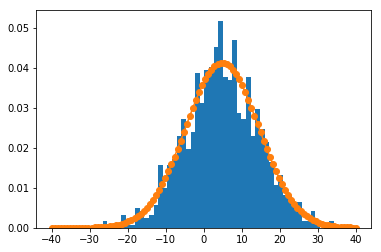

In [6]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

In [ ]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [ ]:
a = RTBM(1,2)

In [ ]:
minim = minimizer.CMA(True)

In [ ]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-5)

## Testing output

In [ ]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')